# Machine Learning

### <font color='orange'>Universidad Autónoma de Yucatán</font> _Facultad de Matemáticas_

**Teacher:** Dr. Victor Uc Cetina <[victoruccetina@gmail.com](mailto:victoruccetina@gmail.com)>

**Student:** Ing. Dayan Bravo Fraga <[dayan3847@gmail.com](mailto:dayan3847@gmail.com)>

# [Binary Classification Gaussian](https://github.com/dayan3847/machine_learning/blob/master/dayan3847/binary_classification_gaussian/gaussian_log2.ipynb) [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dayan3847/machine_learning/blob/master/dayan3847/binary_classification_gaussian/gaussian_log2.ipynb)

In [1]:
import sys
import os

in_colab: bool = 'google.colab' in sys.modules
if in_colab:
    print('Is running in Colab')
    if not os.path.isfile('data.csv'):
        import gdown

        print("Downloading Data")
        url = "https://raw.githubusercontent.com/dayan3847/machine_learning/master/dayan3847/binary_classification_gaussian/data.csv"
        gdown.download(url, quiet=False)
else:
    print('Is not running in Colab')

Is not running in Colab


In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import plotly as py
from abc import ABC, abstractmethod

In [3]:
S = 100

In [4]:
# load data
data = np.loadtxt('data.csv', delimiter=',').T
data

array([[ 7.10360582,  2.02183974, 97.86183422, ..., 18.16168445,
        25.26418333, 81.43604307],
       [ 8.71292997, 83.26198455, 79.91585642, ..., 99.2136903 ,
        25.71676702, 22.12416438],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         1.        ,  1.        ]])

In [5]:
data.shape

(3, 500)

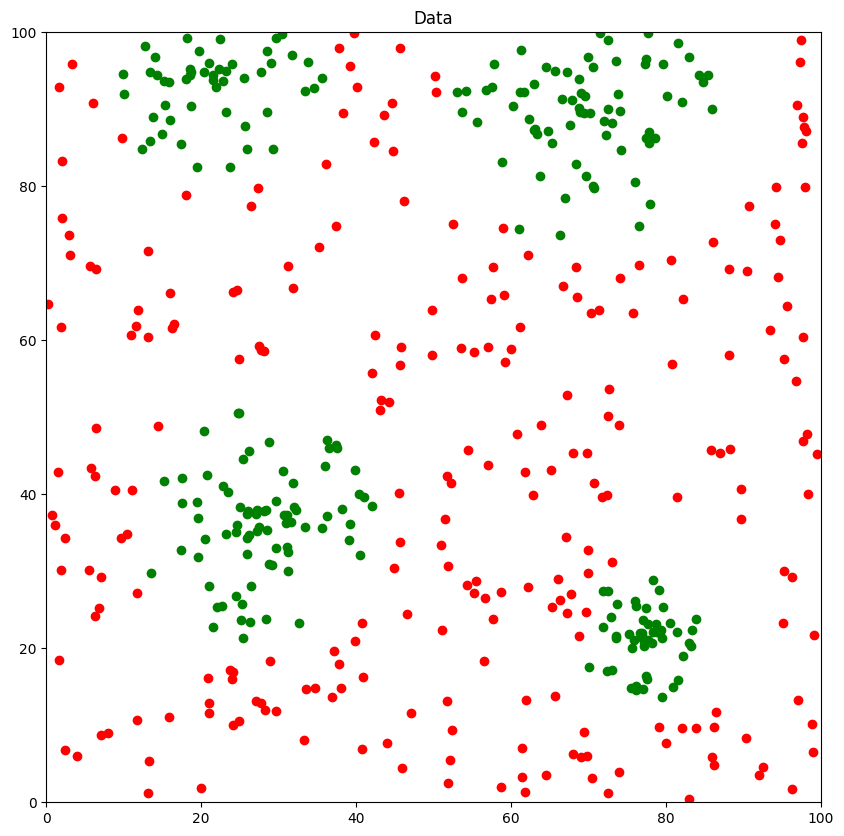

In [6]:
# Plot Data 2D
def plot_data_2d(data_: np.ndarray) -> None:
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(0, S)
    ax.set_ylim(0, S)

    ax.set_title('Data')

    ax.plot(data_[0, data_[2, :] == 0], data_[1, data_[2, :] == 0], 'o', color='red')
    ax.plot(data_[0, data_[2, :] == 1], data_[1, data_[2, :] == 1], 'o', color='green')
    plt.show()


plot_data_2d(data)

In [7]:
# Plot Data 2D (plotly)
def plot_data_2d_py(data_: np.ndarray) -> None:
    fig = py.graph_objs.Figure()
    fig.add_scatter(x=data_[0, data_[2, :] == 0], y=data_[1, data_[2, :] == 0], mode='markers', marker_color='red',
                    name='Class 0')
    fig.add_scatter(x=data_[0, data_[2, :] == 1], y=data_[1, data_[2, :] == 1], mode='markers', marker_color='green',
                    name='Class 1')

    fig.update_layout(
        title='Data',
        xaxis_title='x',
        yaxis_title='y',
        xaxis=dict(range=[0, S]),
        yaxis=dict(range=[0, S]),
        width=1000,
        height=1000
    )

    fig.show()


plot_data_2d_py(data)

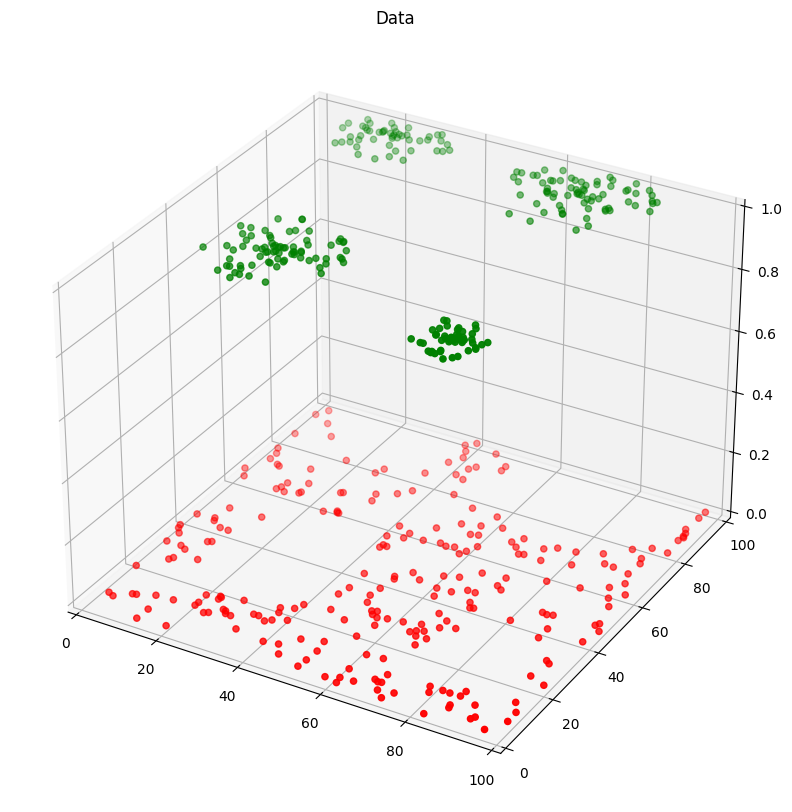

In [8]:
# Plot Data 3D
def plot_data_3d(data_: np.ndarray) -> None:
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(0, S)
    ax.set_ylim(0, S)
    ax.set_zlim(0, 1)

    ax.set_title('Data')

    ax.scatter(data_[0, data_[2, :] == 0], data_[1, data_[2, :] == 0], data_[2, data_[2, :] == 0], c='red', marker='o')
    ax.scatter(data_[0, data_[2, :] == 1], data_[1, data_[2, :] == 1], data_[2, data_[2, :] == 1], c='green',
               marker='o')
    plt.show()


plot_data_3d(data)

In [9]:
# Plot Data 3D (plotly)
def plot_data_3d_py(data_: np.ndarray) -> None:
    fig = py.graph_objs.Figure()
    fig.add_scatter3d(x=data_[0, data_[2, :] == 0], y=data_[1, data_[2, :] == 0], z=data_[2, data_[2, :] == 0],
                      mode='markers', marker_color='red', name='Class 0')
    fig.add_scatter3d(x=data_[0, data_[2, :] == 1], y=data_[1, data_[2, :] == 1], z=data_[2, data_[2, :] == 1],
                      mode='markers', marker_color='green', name='Class 1')

    fig.update_layout(
        title='Data',
        scene=dict(
            xaxis_title='x',
            yaxis_title='y',
            zaxis_title='z',
            xaxis=dict(range=[0, S]),
            yaxis=dict(range=[0, S]),
            zaxis=dict(range=[0, 1]),
        ),
        width=1000,
        height=1000
    )

    fig.show()


plot_data_3d_py(data)

In [10]:
class Model2D(ABC):
    def __init__(self, data: np.ndarray):
        self.data: np.ndarray = data  # Data
        self.cxd: int = 5  # Number of basis functions for dimensions
        self.c: int = self.cxd ** 2  # Number of basis functions
        self.w = np.random.rand(self.c) - .5  # Weights
        self.epochs: int = 1000  # Number of epochs
        self.a: float = 0.1  # Learning rate

        self.error_history: np.array = np.array([])  # Error history

    @abstractmethod
    def equation_basis_function(self) -> sp.Expr:
        pass

    @abstractmethod
    def basis_function(self, x: float, y: float) -> np.array:
        pass

    @abstractmethod
    def equation(self) -> sp.Expr:
        pass

    # Calculate the model value for a simple value
    def hi(self, x: float, y: float) -> float:
        bf: np.array = self.basis_function(x, y)
        return np.dot(self.w, bf)

    # Calculate the model value for a vector
    def h(self, x: np.array, y: np.array) -> np.array:
        return np.array([self.hi(xi, yi) for xi, yi in zip(x, y)])

    def activate(self, h: float) -> float:
        return 1 / (1 + np.exp(-h))

    def gi(self, x: float, y: float) -> float:
        return self.activate(self.hi(x, y))

    def g(self, x: np.array, y: np.array) -> np.array:
        return np.array([self.gi(xi, yi) for xi, yi in zip(x, y)])
    
    def classify_i(self, x: float, y: float) -> int:
        return int(round(self.gi(x, y)))
    
    def classify(self, x: np.array, y: np.array) -> np.array:
        return np.array([self.classify_i(xi, yi) for xi, yi in zip(x, y)])

    def e(self) -> float:
        return np.sum((self.g(self.data[0],self.data[1]) - self.data[2]) ** 2) / 2
    
    def accuracy(self) -> float:
        return np.sum(self.classify(self.data[0],self.data[1]) == self.data[2]) / self.data.shape[1]

    def summary(self):
        print('Model: {}'.format(self.__class__.__name__))
        print('Error: {}'.format(round(self.e(), 2)))
        print('Accuracy: {}'.format(round(self.accuracy(), 2)))

    def train(self):
        for _ in range(self.epochs):
            self.save()
            self.train_step()

    def train_step(self):
        a = self.a
        x_ = self.data[0]
        y_ = self.data[1]
        z_ = self.data[2]
        for x, y, z in zip(x_, y_, z_):
            b = self.basis_function(x,y)
            g = self.gi(x,y)
            for i in range(self.c):
                self.w[i] -= a * (g - z) * b[i]

    def save(self):
        self.error_history = np.append(self.error_history, self.e())


In [11]:
class Model2DGaussian(Model2D):
    def __init__(self, d: np.ndarray):
        super().__init__(d)
        _m: np.array = np.linspace(0, 100, self.cxd)
        self.m1, self.m2 = np.meshgrid(_m, _m)
        self.m1 = self.m1.flatten()
        self.m2 = self.m2.flatten()
        self.s: np.array = np.full(self.c, 10)

    def equation_basis_function(self) -> sp.Expr:
        x: sp.Symbol = sp.Symbol('x')
        m1, m2 = sp.symbols('m1 m2')
        s: sp.Symbol = sp.Symbol('s')
        return sp.exp(-1 * ((x - m1) ** 2) / (2 * (s ** 2))) * sp.exp(-1 * ((x - m2) ** 2) / (2 * (s ** 2)))

    def equation(self) -> sp.Expr:
        r: sp.Symbol = 0
        for w, m1, m2, s in zip(self.w, self.m1, self.m2, self.s):
            w_: float = round(w, 2)
            r += w_ * self.equation_basis_function().subs({'m1': round(m1, 2), 'm2': round(m2, 2), 's': s})
        return r

    def basis_function(self, x: float, y: float) -> np.array:
        x_: np.array = np.full(self.c, x)
        y_: np.array = np.full(self.c, y)

        return (np.exp(-1 * ((x_ - self.m1) ** 2) / (2 * (self.s ** 2))) *
                np.exp(-1 * ((y_ - self.m2) ** 2) / (2 * (self.s ** 2))))


model_g: Model2D = Model2DGaussian(data)
model_g.summary()
model_g.equation_basis_function()


Model: Model2DGaussian
Error: 60.21
Accuracy: 0.59


exp(-(-m1 + x)**2/(2*s**2))*exp(-(-m2 + x)**2/(2*s**2))

In [12]:
model_g.equation()

0.42*exp(-6.25*(0.04*x - 1)**2) + 0.38*exp(-25.0*(0.02*x - 1)**2) + 0.12*exp(-12.5*(0.02*x - 1)**2)*exp(-3.125*(0.04*x - 1)**2) - 0.45*exp(-56.25*(0.0133333333333333*x - 1)**2) + 0.1*exp(-28.125*(0.0133333333333333*x - 1)**2)*exp(-3.125*(0.04*x - 1)**2) + 0.35*exp(-28.125*(0.0133333333333333*x - 1)**2)*exp(-12.5*(0.02*x - 1)**2) + 0.45*exp(-100.0*(0.01*x - 1)**2) + 0.51*exp(-50.0*(0.01*x - 1)**2)*exp(-3.125*(0.04*x - 1)**2) - 0.05*exp(-50.0*(0.01*x - 1)**2)*exp(-12.5*(0.02*x - 1)**2) + 0.77*exp(-50.0*(0.01*x - 1)**2)*exp(-28.125*(0.0133333333333333*x - 1)**2) + 0.24*exp(-x**2/100) + 0.78*exp(-x**2/200)*exp(-3.125*(0.04*x - 1)**2) - 0.14*exp(-x**2/200)*exp(-12.5*(0.02*x - 1)**2) - 0.1*exp(-x**2/200)*exp(-28.125*(0.0133333333333333*x - 1)**2) + 0.36*exp(-x**2/200)*exp(-50.0*(0.01*x - 1)**2)

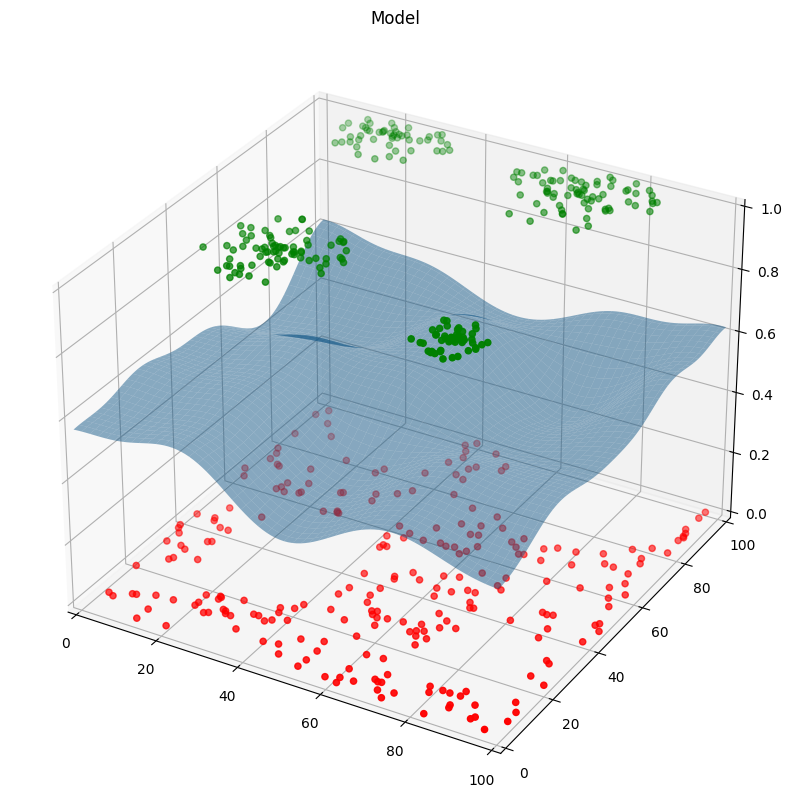

In [13]:
# Plot

def plot_model_2d_in_3d(model_: Model2D, data_: np.ndarray) -> None:
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(0, S)
    ax.set_ylim(0, S)
    ax.set_zlim(0, 1)

    ax.set_title('Model')

    ax.scatter(data_[0, data_[2, :] == 0], data_[1, data_[2, :] == 0], data_[2, data_[2, :] == 0], c='red', marker='o')
    ax.scatter(data_[0, data_[2, :] == 1], data_[1, data_[2, :] == 1], data_[2, data_[2, :] == 1], c='green',
               marker='o')

    x = np.linspace(0, S, 100)
    y = np.linspace(0, S, 100)
    x, y = np.meshgrid(x, y)
    x = x.flatten()
    y = y.flatten()
    z = model_.g(x, y)
    x = x.reshape((100, 100))
    y = y.reshape((100, 100))
    z = z.reshape((100, 100))
    ax.plot_surface(x, y, z, alpha=0.5)

    plt.show()

plot_model_2d_in_3d(model_g, data)

In [14]:
# Plot (plotly)

def plot_model_2d_in_3d_py(model_: Model2D, data_: np.ndarray) -> None:
    fig = py.graph_objs.Figure()
    fig.add_scatter3d(x=data_[0, data_[2, :] == 0], y=data_[1, data_[2, :] == 0], z=data_[2, data_[2, :] == 0],
                      mode='markers', marker_color='red', name='Class 0')
    fig.add_scatter3d(x=data_[0, data_[2, :] == 1], y=data_[1, data_[2, :] == 1], z=data_[2, data_[2, :] == 1],
                      mode='markers', marker_color='green', name='Class 1')

    x = np.linspace(0, S, 100)
    y = np.linspace(0, S, 100)
    x, y = np.meshgrid(x, y)
    x = x.flatten()
    y = y.flatten()
    z = model_.g(x, y)
    x = x.reshape((100, 100))
    y = y.reshape((100, 100))
    z = z.reshape((100, 100))
    fig.add_surface(x=x, y=y, z=z, opacity=0.5)

    fig.update_layout(
        title='Model',
        scene=dict(
            xaxis_title='x',
            yaxis_title='y',
            zaxis_title='z',
            xaxis=dict(range=[0, S]),
            yaxis=dict(range=[0, S]),
            zaxis=dict(range=[0, 1]),
        ),
        width=1000,
        height=1000
    )

    fig.show()


plot_model_2d_in_3d_py(model_g, data)

In [15]:
model_g.train()

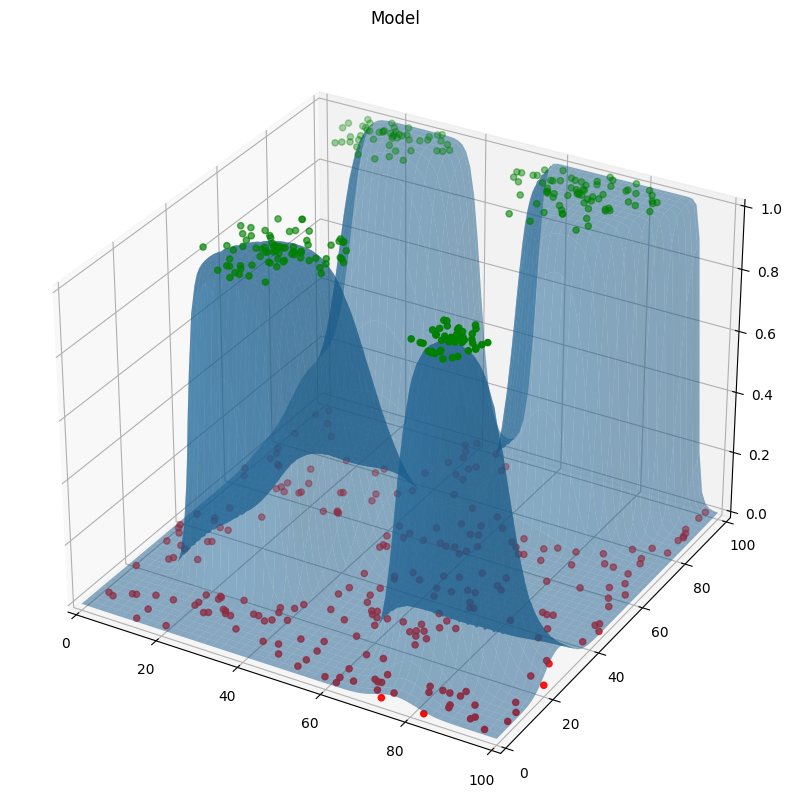

In [16]:
plot_model_2d_in_3d(model_g, data)

In [17]:

plot_model_2d_in_3d_py(model_g, data)

In [18]:
model_g.summary()

Model: Model2DGaussian
Error: 8.22
Accuracy: 0.95
